In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# version of numpy library
print("Version of numpy:", np.__version__)

Version of numpy: 1.23.1


In [3]:
# version of matplotlib library
import matplotlib

print("Version of matplotlib:", matplotlib.__version__)

Version of matplotlib: 3.7.2


In [4]:
import pandas as pd

In [5]:
# set random seed
np.random.seed(42)

In [6]:
# creating the input array
X = np.array([[1, 0, 0, 0], [1, 0, 1, 1], [0, 1, 0, 1]])

print("Input:\n", X)

# shape of input array
print("\nShape of Input:", X.shape)

pd.DataFrame(X)

Input:
 [[1 0 0 0]
 [1 0 1 1]
 [0 1 0 1]]

Shape of Input: (3, 4)


,0,1,2,3
0,1,0,0,0
1,1,0,1,1
2,0,1,0,1


In [7]:
# converting the input in matrix form
X = X.T
print("Input in matrix form:\n", X)

# shape of input matrix
print("\nShape of Input Matrix:", X.shape)

pd.DataFrame(X)

Input in matrix form:
 [[1 1 0]
 [0 0 1]
 [0 1 0]
 [0 1 1]]

Shape of Input Matrix: (4, 3)


,0,1,2
0,1,1,0
1,0,0,1
2,0,1,0
3,0,1,1


In [8]:
# creating the output array
y = np.array([[1], [1], [0]])

print("Actual Output:\n", y)

# output in matrix form
y = y.T

print("\nOutput in matrix form:\n", y)

# shape of input array
print("\nShape of Output:", y.shape)

Actual Output:
 [[1]
 [1]
 [0]]

Output in matrix form:
 [[1 1 0]]

Shape of Output: (1, 3)


In [9]:
inputLayer_neurons = X.shape[0]  # number of features in data set
hiddenLayer_neurons = 3  # number of hidden layers neurons
outputLayer_neurons = 1  # number of neurons at output layer

In [13]:
# initializing weight
# Shape of weights_input_hidden should number of neurons at input layer * number of neurons at hidden layer
weights_input_hidden = np.random.uniform(size=(inputLayer_neurons, hiddenLayer_neurons))
inputLayer_neurons, hiddenLayer_neurons, weights_input_hidden.shape

(4, 3, (4, 3))

In [14]:
# Shape of weights_hidden_output should number of neurons at hidden layer * number of neurons at output layer
weights_hidden_output = np.random.uniform(size=(hiddenLayer_neurons, outputLayer_neurons))
hiddenLayer_neurons, outputLayer_neurons, weights_hidden_output.shape

(3, 1, (3, 1))

In [15]:
# shape of weight matrix
weights_input_hidden.shape, weights_input_hidden.T.shape, weights_hidden_output.shape# We are using sigmoid as an activation function so defining the sigmoid function here

((4, 3), (3, 4), (3, 1))

In [16]:
weights_input_hidden.shape,X.shape

((4, 3), (4, 3))

In [18]:
# We are using sigmoid as an activation function so defining the sigmoid function here

# defining the Sigmoid Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [21]:
# hidden layer activations
hiddenLayer_linearTransform = np.dot(weights_input_hidden.T, X)
print(hiddenLayer_linearTransform.shape)
print(hiddenLayer_linearTransform)

(3, 3)
[[0.30461377 1.00152457 1.10267478]
 [0.09767211 1.31870359 0.43374931]
 [0.68423303 1.46308103 1.01524493]]


In [23]:
sigmoid(0.30461377)

0.5755700019895433

In [22]:
hiddenLayer_activations = sigmoid(hiddenLayer_linearTransform)
hiddenLayer_activations

array([[0.57557   , 0.73135822, 0.75076094],
       [0.52439863, 0.78896594, 0.60676861],
       [0.66468281, 0.81200346, 0.73404534]])

In [26]:
weights_hidden_output.T.shape, hiddenLayer_activations.shape

((1, 3), (3, 3))

In [24]:
# calculating the output
outputLayer_linearTransform = np.dot(weights_hidden_output.T, hiddenLayer_activations)
output = sigmoid(outputLayer_linearTransform)
output

array([[0.74193951, 0.79133495, 0.77457582]])

In [25]:
# calculating error
error = np.square(y - output) / 2
error

array([[0.03329761, 0.02177055, 0.29998385]])

##### We have completed our forward propagation step and got the error. Now let’s do a backward propagation to calculate the error with respect to each weight of the neuron and then update these weights using simple gradient descent.

In [32]:
# rate of change of error w.r.t. output
error_wrt_output = -(y - output)
error_wrt_output

array([[-0.31665306, -0.27302922,  0.71257368]])

In [33]:
# rate of change of output w.r.t. Z2
output_wrt_outputLayer_LinearTransform = np.multiply(output, (1 - output))
output_wrt_outputLayer_LinearTransform

array([[0.2163839 , 0.19848426, 0.20481243]])

In [26]:
# rate of change of Z2 w.r.t. weights between hidden and output layer
outputLayer_LinearTransform_wrt_weights_hidden_output = hiddenLayer_activations
outputLayer_LinearTransform_wrt_weights_hidden_output

array([[0.57557   , 0.73135822, 0.75076094],
       [0.52439863, 0.78896594, 0.60676861],
       [0.66468281, 0.81200346, 0.73404534]])

In [35]:
# checking the shapes of partial derivatives
error_wrt_output.shape, output_wrt_outputLayer_LinearTransform.shape, outputLayer_LinearTransform_wrt_weights_hidden_output.shape

((1, 3), (1, 3), (3, 3))

In [36]:
# shape of weights of output layer
weights_hidden_output.shape

(3, 1)

In [38]:
# rate of change of error w.r.t weight between hidden and output layer
error_wrt_weights_hidden_output = np.dot(
    outputLayer_LinearTransform_wrt_weights_hidden_output,
    (error_wrt_output * output_wrt_outputLayer_LinearTransform).T,
)

In [39]:
error_wrt_weights_hidden_output.shape

(3, 1)

In [42]:
# rate of change of error w.r.t. output
error_wrt_output = -(y - output)

# rate of change of output w.r.t. Z2
output_wrt_outputLayer_LinearTransform = np.multiply(output, (1 - output))

# rate of change of Z2 w.r.t. hidden layer activations
outputLayer_LinearTransform_wrt_hiddenLayer_activations = weights_hidden_output

In [43]:
# rate of change of hidden layer activations w.r.t. Z1
hiddenLayer_activations_wrt_hiddenLayer_linearTransform = np.multiply(
    hiddenLayer_activations, (1 - hiddenLayer_activations)
)

In [44]:
# rate of change of Z1 w.r.t. weights between input and hidden layer
hiddenLayer_linearTransform_wrt_weights_input_hidden = X

In [45]:
# checking the shapes of partial derivatives
print(
    error_wrt_output.shape,
    output_wrt_outputLayer_LinearTransform.shape,
    outputLayer_LinearTransform_wrt_hiddenLayer_activations.shape,
    hiddenLayer_activations_wrt_hiddenLayer_linearTransform.shape,
    hiddenLayer_linearTransform_wrt_weights_input_hidden.shape,
)

(1, 3) (1, 3) (3, 1) (3, 3) (4, 3)


In [46]:
# shape of weights of hidden layer
weights_input_hidden.shape

(4, 3)

In [47]:
# rate of change of error w.r.t weights between input and hidden layer
error_wrt_weights_input_hidden = np.dot(
    hiddenLayer_linearTransform_wrt_weights_input_hidden,
    (
        hiddenLayer_activations_wrt_hiddenLayer_linearTransform
        * np.dot(
            outputLayer_LinearTransform_wrt_hiddenLayer_activations,
            (output_wrt_outputLayer_LinearTransform * error_wrt_output),
        )
    ).T,
)

In [48]:
error_wrt_weights_input_hidden.shape

(4, 3)

In [49]:
# defining the learning rate
lr = 0.01

In [50]:
# initial weights_hidden_output
weights_hidden_output

array([[0.83244264],
       [0.21233911],
       [0.18182497]])

In [51]:
# initial weights_input_hidden
weights_input_hidden

array([[0.37454012, 0.95071431, 0.73199394],
       [0.59865848, 0.15601864, 0.15599452],
       [0.05808361, 0.86617615, 0.60111501],
       [0.70807258, 0.02058449, 0.96990985]])

In [52]:
# updating the weights of output layer
weights_hidden_output = weights_hidden_output - lr * error_wrt_weights_hidden_output

In [53]:
# updating the weights of hidden layer
weights_input_hidden = weights_input_hidden - lr * error_wrt_weights_input_hidden

In [54]:
# updated weights_hidden_output
weights_hidden_output

array([[0.83211079],
       [0.21250681],
       [0.18167831]])

In [55]:
# updated weights_input_hidden
weights_input_hidden

array([[0.37476062, 0.95075719, 0.7320294 ],
       [0.59845481, 0.15594177, 0.15594545],
       [0.05816641, 0.86618978, 0.60112315],
       [0.70795169, 0.02052126, 0.96986892]])

##### Now, this is just one iteration (or epoch) of the forward and backward pass. We have to do it multiple times to make our model perform better. Let’s perform the steps above again for 1000 epochs

In [56]:
# defining the model architecture
inputLayer_neurons = X.shape[0]  # number of features in data set
hiddenLayer_neurons = 3  # number of hidden layers neurons
outputLayer_neurons = 1  # number of neurons at output layer

# initializing weight
weights_input_hidden = np.random.uniform(size=(inputLayer_neurons, hiddenLayer_neurons))
weights_hidden_output = np.random.uniform(
    size=(hiddenLayer_neurons, outputLayer_neurons)
)

# defining the parameters
lr = 0.1
epochs = 1000

In [57]:
losses = []
for epoch in range(epochs):
    ## Forward Propogation
    # calculating hidden layer activations
    hiddenLayer_linearTransform = np.dot(weights_input_hidden.T, X)
    hiddenLayer_activations = sigmoid(hiddenLayer_linearTransform)

    # calculating the output
    outputLayer_linearTransform = np.dot(
        weights_hidden_output.T, hiddenLayer_activations
    )
    output = sigmoid(outputLayer_linearTransform)

    ## Backward Propagation

    # calculating error
    error = np.square(y - output) / 2

    # calculating rate of change of error w.r.t weight between hidden and output layer
    error_wrt_output = -(y - output)
    output_wrt_outputLayer_LinearTransform = np.multiply(output, (1 - output))
    outputLayer_LinearTransform_wrt_weights_hidden_output = hiddenLayer_activations

    error_wrt_weights_hidden_output = np.dot(
        outputLayer_LinearTransform_wrt_weights_hidden_output,
        (error_wrt_output * output_wrt_outputLayer_LinearTransform).T,
    )

    # calculating rate of change of error w.r.t weights between input and hidden layer
    outputLayer_LinearTransform_wrt_hiddenLayer_activations = weights_hidden_output
    hiddenLayer_activations_wrt_hiddenLayer_linearTransform = np.multiply(
        hiddenLayer_activations, (1 - hiddenLayer_activations)
    )
    
    hiddenLayer_linearTransform_wrt_weights_input_hidden = X
    error_wrt_weights_input_hidden = np.dot(
        hiddenLayer_linearTransform_wrt_weights_input_hidden,
        (
            hiddenLayer_activations_wrt_hiddenLayer_linearTransform
            * np.dot(
                outputLayer_LinearTransform_wrt_hiddenLayer_activations,
                (output_wrt_outputLayer_LinearTransform * error_wrt_output),
            )
        ).T,
    )

    # updating the weights
    weights_hidden_output = weights_hidden_output - lr * error_wrt_weights_hidden_output
    weights_input_hidden = weights_input_hidden - lr * error_wrt_weights_input_hidden

    # print error at every 100th epoch
    epoch_loss = np.average(error)
    if epoch % 100 == 0:
        print(f"Error at epoch {epoch} is {epoch_loss:.5f}")

    # appending the error of each epoch
    losses.append(epoch_loss)

Error at epoch 0 is 0.11553
Error at epoch 100 is 0.11082
Error at epoch 200 is 0.10606
Error at epoch 300 is 0.09845
Error at epoch 400 is 0.08483
Error at epoch 500 is 0.06396
Error at epoch 600 is 0.04206
Error at epoch 700 is 0.02641
Error at epoch 800 is 0.01719
Error at epoch 900 is 0.01190


In [58]:
# updated w_ih
weights_input_hidden

array([[ 1.25679149,  1.72312858, -0.27336634],
       [-1.07615756, -1.73777864,  1.42316207],
       [ 0.63053865,  0.88090942, -0.03448117],
       [-0.56098781, -0.65506704,  0.61013995]])

In [59]:
# updated w_ho
weights_hidden_output

array([[ 1.45176252],
       [ 2.59109536],
       [-2.18347501]])

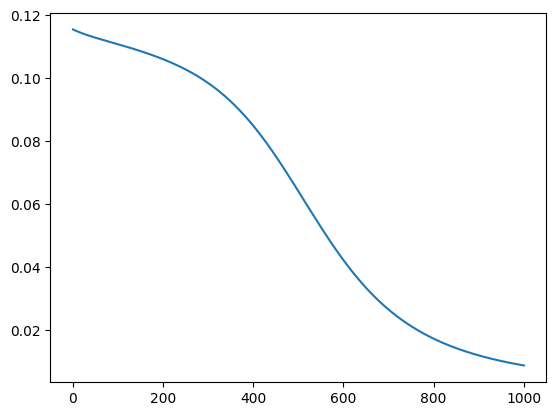

In [60]:
# visualizing the error after each epoch
plt.plot(np.arange(1, epochs + 1), np.array(losses))

In [61]:
# final output from the model
output

array([[0.9155779 , 0.89643511, 0.18608711]])

In [62]:
# actual target
y

array([[1, 1, 0]])